## ML Lab Week3 by Smeet 200968236
### Excercise 1

Data description:<br>

Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
Sibsp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Q6] Preprocessing:

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.replace("male",0, inplace=True)
titanic.replace("female",1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.loc[(titanic.Cabin.isna()==False),'HasCabin']=1
titanic['HasCabin'] = titanic['HasCabin'].fillna(0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1.0


In [6]:
titanic.loc[(titanic.SibSp>=1) | (titanic.Parch>=1),'HasFamily' ]=1
titanic['HasFamily'] = titanic['HasFamily'].fillna(0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1.0,0.0


In [7]:
titanic.loc[titanic.Age<18, 'Survived'].value_counts()

1    61
0    52
Name: Survived, dtype: int64

In [8]:
titanic.loc[(titanic.Age>30) & (titanic.Age<40), 'Survived'].value_counts()

0    79
1    63
Name: Survived, dtype: int64

In [9]:
titanic.loc[titanic.Age<=18, 'Child']=1
titanic['Child'] = titanic['Child'].fillna(0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasFamily,Child
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1.0,0.0,0.0


In [10]:
titanic_processed = titanic.drop(['Name','Age', 'Cabin','PassengerId','SibSp','Parch','Ticket','Cabin'], axis=1)
titanic_processed
titanic_processed

,Survived,Pclass,Sex,Fare,Embarked,HasCabin,HasFamily,Child
0,0,3,0,7.2500,S,0.0,1.0,0.0
1,1,1,1,71.2833,C,1.0,1.0,0.0
2,1,3,1,7.9250,S,0.0,0.0,0.0
3,1,1,1,53.1000,S,1.0,1.0,0.0
4,0,3,0,8.0500,S,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,13.0000,S,0.0,0.0,0.0
887,1,1,1,30.0000,S,1.0,0.0,0.0
888,0,3,1,23.4500,S,0.0,1.0,0.0
889,1,1,0,30.0000,C,1.0,0.0,0.0


In [11]:
x = titanic_processed.drop(columns=['Survived'])
y = titanic_processed['Survived']

### Q7]Pipeline & Model Fitting

In [12]:
#Selecting numeric & categorical columns
numeric = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]
categoric = [cname for cname in x.columns if x[cname].dtype == 'object']

In [13]:
# scaling numericals
numerical_transformer = Pipeline(steps = [
    ('scaler', RobustScaler())
])

# one-hot encoding categorical
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numeric),
        ('categorical', categorical_transformer, categoric),
      ])

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [15]:
# bundle preprocessing and modeling code in a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('model', model)])

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=105, shuffle=True)

In [17]:
accuracy = cross_val_score(pipe, x, y, cv=cv, scoring='accuracy')
np.mean(accuracy)

0.6656304619225967

In [18]:
precision = cross_val_score(pipe, x, y, cv=cv, scoring='precision')
np.mean(precision)

0.816818181818182

In [19]:
recall = cross_val_score(pipe, x, y, cv=cv, scoring='recall')
np.mean(recall)

0.1636768207849434

### Q9] Measures of Accuracy

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(pipe, x, y, cv=10)
cm = confusion_matrix(y, y_pred)

In [21]:
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]

acc = (tp+tn)/(tp+tn+fp+fn)
tpr = tp/(fn+tp)
tnr = tn/(tn+fp)

print("Accuracy = ", acc)
print("Sensitivity = ", tpr)
print("Specificity = ", tnr)

Accuracy =  0.6666666666666666
Sensitivity =  0.16374269005847952
Specificity =  0.9799635701275046


### Q10] ROC curve

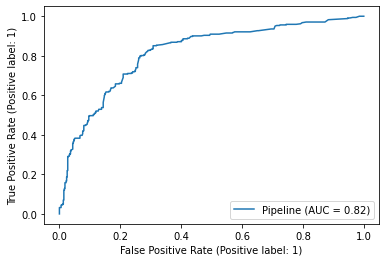

In [22]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
pipe.fit(x, y)
plot_roc_curve(pipe, x, y)

In [24]:
r =  roc_auc_score(y,y_pred)
r

0.5718531300929921

ROC curve moving towards the top and left means that the classifier is good.
The area under the curve is directly proportional to how good the classifier is.
And a 45 degree line corresponds to random predictions.
As the area under the curve is 0.57, it is a moderately accurate model.